<center>
    <img src="https://gitlab.com/ibm/skills-network/courses/placeholder101/-/raw/master/labs/module%201/images/IDSNlogo.png" width="300" alt="cognitiveclass.ai logo"  />
</center>


# **Launch Sites Locations Analysis with Folium**


Estimated time needed: **40** minutes


The launch success rate may depend on many factors such as payload mass, orbit type, and so on. It may also depend on the location and proximities of a launch site, i.e., the initial position of rocket trajectories. Finding an optimal location for building a launch site certainly involves many factors and hopefully we could discover some of the factors by analyzing the existing launch site locations.


In the previous exploratory data analysis labs, you have visualized the SpaceX launch dataset using `matplotlib` and `seaborn` and discovered some preliminary correlations between the launch site and success rates. In this lab, you will be performing more interactive visual analytics using `Folium`.


## Objectives


This lab contains the following tasks:

*   **TASK 1:** Mark all launch sites on a map
*   **TASK 2:** Mark the success/failed launches for each site on the map
*   **TASK 3:** Calculate the distances between a launch site to its proximities

After completed the above tasks, you should be able to find some geographical patterns about launch sites.


Let's first import required Python packages for this lab:


In [1]:
!pip3 install folium
!pip3 install wget

     |████████████████████████████████| 95 kB 4.0 MB/s  eta 0:00:01
  Created wheel for wget: filename=wget-3.2-py3-none-any.whl size=9681 sha256=73bca6180c7fcd0c98644de15c7c69b9150af5917dc2d1e639f0e1b681593fa5
  Stored in directory: /tmp/wsuser/.cache/pip/wheels/bd/a8/c3/3cf2c14a1837a4e04bd98631724e81f33f462d86a1d895fae0
Successfully built wget


In [2]:
import folium
import wget
import pandas as pd

In [3]:
# Import folium MarkerCluster plugin
from folium.plugins import MarkerCluster
# Import folium MousePosition plugin
from folium.plugins import MousePosition
# Import folium DivIcon plugin
from folium.features import DivIcon

If you need to refresh your memory about folium, you may download and refer to this previous folium lab:


[Generating Maps with Python](https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/IBM-DS0321EN-SkillsNetwork/labs/module\_3/DV0101EN-3-5-1-Generating-Maps-in-Python-py-v2.0.ipynb)


## Task 1: Mark all launch sites on a map


First, let's try to add each site's location on a map using site's latitude and longitude coordinates


The following dataset with the name `spacex_launch_geo.csv` is an augmented dataset with latitude and longitude added for each site.


In [4]:
# Download and read the `spacex_launch_geo.csv`
spacex_csv_file = wget.download('https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/IBM-DS0321EN-SkillsNetwork/datasets/spacex_launch_geo.csv')
spacex_df=pd.read_csv(spacex_csv_file)

Now, you can take a look at what are the coordinates for each site.


In [5]:
# Select relevant sub-columns: `Launch Site`, `Lat(Latitude)`, `Long(Longitude)`, `class`
spacex_df = spacex_df[['Launch Site', 'Lat', 'Long', 'class']]
launch_sites_df = spacex_df.groupby(['Launch Site'], as_index=False).first()
launch_sites_df = launch_sites_df[['Launch Site', 'Lat', 'Long']]
launch_sites_df

,Launch Site,Lat,Long
0,CCAFS LC-40,28.562302,-80.577356
1,CCAFS SLC-40,28.563197,-80.576820
2,KSC LC-39A,28.573255,-80.646895
3,VAFB SLC-4E,34.632834,-120.610746


Above coordinates are just plain numbers that can not give you any intuitive insights about where are those launch sites. If you are very good at geography, you can interpret those numbers directly in your mind. If not, that's fine too. Let's visualize those locations by pinning them on a map.


We first need to create a folium `Map` object, with an initial center location to be NASA Johnson Space Center at Houston, Texas.


In [6]:
# Start location is NASA Johnson Space Center
nasa_coordinate = [29.559684888503615, -95.0830971930759]
site_map = folium.Map(location=nasa_coordinate, zoom_start=10)

We could use `folium.Circle` to add a highlighted circle area with a text label on a specific coordinate. For example,


In [7]:
# Create a blue circle at NASA Johnson Space Center's coordinate with a popup label showing its name
circle = folium.Circle(nasa_coordinate, radius=1000, color='#d35400', fill=True).add_child(folium.Popup('NASA Johnson Space Center'))
# Create a blue circle at NASA Johnson Space Center's coordinate with a icon showing its name
marker = folium.map.Marker(
    nasa_coordinate,
    # Create an icon as a text label
    icon=DivIcon(
        icon_size=(20,20),
        icon_anchor=(0,0),
        html='<div style="font-size: 12; color:#d35400;"><b>%s</b></div>' % 'NASA JSC',
        )
    )
site_map.add_child(circle)
site_map.add_child(marker)

and you should find a small yellow circle near the city of Houston and you can zoom-in to see a larger circle.


Now, let's add a circle for each launch site in data frame `launch_sites`


*TODO:*  Create and add `folium.Circle` and `folium.Marker` for each launch site on the site map


An example of folium.Circle:


`folium.Circle(coordinate, radius=1000, color='#000000', fill=True).add_child(folium.Popup(...))`


An example of folium.Marker:


`folium.map.Marker(coordinate, icon=DivIcon(icon_size=(20,20),icon_anchor=(0,0), html='<div style="font-size: 12; color:#d35400;"><b>%s</b></div>' % 'label', ))`


In [8]:
nasa_coordinate = [29.559684888503615, -95.0830971930759]
CCAFS_LC_40_coor=[28.562302,-80.577356]
CCAFS_SLC_40_coor=[28.563197,-80.576820]
KSC_LC_39A_coor=[28.573255,-80.646895]
VAFB_SLC_4E_coor=[34.632834,-120.610746]

# Initial the map
site_map = folium.Map(location=nasa_coordinate, zoom_start=5)

# For each launch site, add a Circle object based on its coordinate (Lat, Long) values. In addition, add Launch site name as a popup label
# Create a blue circle at NASA Johnson Space Center's coordinate with a popup label showing its name
circle = folium.Circle(nasa_coordinate, radius=1000, color='#d35400', fill=True).add_child(folium.Popup('NASA Johnson Space Center'))
# Create a blue circle at NASA Johnson Space Center's coordinate with a icon showing its name
marker = folium.map.Marker(
    nasa_coordinate,
    # Create an icon as a text label
    icon=DivIcon(
        icon_size=(20,20),
        icon_anchor=(0,0),
        html='<div style="font-size: 12; color:#d35400;"><b>%s</b></div>' % 'NASA JSC',
        )
    )
circle1 = folium.Circle(CCAFS_LC_40_coor, radius=1000, color='#d35400', fill=True).add_child(folium.Popup('CCAFS_LC_40'))
# Create a blue circle at NASA Johnson Space Center's coordinate with a icon showing its name
marker1 = folium.map.Marker(
    CCAFS_LC_40_coor,
    # Create an icon as a text label
    icon=DivIcon(
        icon_size=(20,20),
        icon_anchor=(0,0),
        html='<div style="font-size: 12; color:#d35400;"><b>%s</b></div>' % 'CCAFS_LC_40',
        )
    )
circle2 = folium.Circle(CCAFS_SLC_40_coor, radius=1000, color='#d35400', fill=True).add_child(folium.Popup('CCAFS_SLC_40'))
# Create a blue circle at NASA Johnson Space Center's coordinate with a icon showing its name
marker2 = folium.map.Marker(
    CCAFS_SLC_40_coor,
    # Create an icon as a text label
    icon=DivIcon(
        icon_size=(20,20),
        icon_anchor=(0,0),
        html='<div style="font-size: 12; color:#d35400;"><b>%s</b></div>' % 'CCAFS_SLC_40',
        )
    )
circle3 = folium.Circle(KSC_LC_39A_coor, radius=1000, color='#d35400', fill=True).add_child(folium.Popup('KSC_LC_39A'))
# Create a blue circle at NASA Johnson Space Center's coordinate with a icon showing its name
marker3 = folium.map.Marker(
    KSC_LC_39A_coor,
    # Create an icon as a text label
    icon=DivIcon(
        icon_size=(20,20),
        icon_anchor=(0,0),
        html='<div style="font-size: 12; color:#d35400;"><b>%s</b></div>' % 'KSC_LC_39A',
        )
    )
circle4 = folium.Circle(VAFB_SLC_4E_coor, radius=1000, color='#d35400', fill=True).add_child(folium.Popup('VAFB_SLC_4E'))
# Create a blue circle at NASA Johnson Space Center's coordinate with a icon showing its name
marker4 = folium.map.Marker(
    VAFB_SLC_4E_coor,
    # Create an icon as a text label
    icon=DivIcon(
        icon_size=(20,20),
        icon_anchor=(0,0),
        html='<div style="font-size: 12; color:#d35400;"><b>%s</b></div>' % 'VAFB_SLC_4E',
        )
    )

site_map.add_child(circle)
site_map.add_child(marker)
site_map.add_child(circle1)
site_map.add_child(marker1)
site_map.add_child(circle2)
site_map.add_child(marker2)
site_map.add_child(circle3)
site_map.add_child(marker3)
site_map.add_child(circle4)
site_map.add_child(marker4)

The generated map with marked launch sites should look similar to the following:


<center>
    <img src="https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/IBM-DS0321EN-SkillsNetwork/labs/module_3/images/launch_site_markers.png" />
</center>


Now, you can explore the map by zoom-in/out the marked areas
, and try to answer the following questions:

*   Are all launch sites in proximity to the Equator line?
*   Are all launch sites in very close proximity to the coast?

Also please try to explain your findings.


It can be seen from the generated folium map that the launch sites are close to the equator and to the coast. 

# Task 2: Mark the success/failed launches for each site on the map


Next, let's try to enhance the map by adding the launch outcomes for each site, and see which sites have high success rates.
Recall that data frame spacex_df has detailed launch records, and the `class` column indicates if this launch was successful or not


In [9]:
spacex_df.tail(10)

,Launch Site,Lat,Long,class
46,KSC LC-39A,28.573255,-80.646895,1
47,KSC LC-39A,28.573255,-80.646895,1
48,KSC LC-39A,28.573255,-80.646895,1
49,CCAFS SLC-40,28.563197,-80.576820,1
50,CCAFS SLC-40,28.563197,-80.576820,1
51,CCAFS SLC-40,28.563197,-80.576820,0
52,CCAFS SLC-40,28.563197,-80.576820,0
53,CCAFS SLC-40,28.563197,-80.576820,0
54,CCAFS SLC-40,28.563197,-80.576820,1
55,CCAFS SLC-40,28.563197,-80.576820,0


Next, let's create markers for all launch records.
If a launch was successful `(class=1)`, then we use a green marker and if a launch was failed, we use a red marker `(class=0)`


Note that a launch only happens in one of the four launch sites, which means many launch records will have the exact same coordinate. Marker clusters can be a good way to simplify a map containing many markers having the same coordinate.


Let's first create a `MarkerCluster` object


In [10]:
marker_cluster = MarkerCluster()


*TODO:* Create a new column in `launch_sites` dataframe called `marker_color` to store the marker colors based on the `class` value


In [11]:
# Function to assign color to launch outcome
def assign_marker_color(launch_outcome):
    if launch_outcome == 1:
        return 'green'
    else:
        return 'red'
    
spacex_df['marker_color'] = spacex_df['class'].apply(assign_marker_color)
spacex_df.tail(10)

,Launch Site,Lat,Long,class,marker_color
46,KSC LC-39A,28.573255,-80.646895,1,green
47,KSC LC-39A,28.573255,-80.646895,1,green
48,KSC LC-39A,28.573255,-80.646895,1,green
49,CCAFS SLC-40,28.563197,-80.576820,1,green
50,CCAFS SLC-40,28.563197,-80.576820,1,green
51,CCAFS SLC-40,28.563197,-80.576820,0,red
52,CCAFS SLC-40,28.563197,-80.576820,0,red
53,CCAFS SLC-40,28.563197,-80.576820,0,red
54,CCAFS SLC-40,28.563197,-80.576820,1,green
55,CCAFS SLC-40,28.563197,-80.576820,0,red


In [12]:
spacex_df.columns

Index(['Launch Site', 'Lat', 'Long', 'class', 'marker_color'], dtype='object')

In [13]:
spacex_df.rename({'Launch Site':'Launch_Site'}, axis=1, inplace=True)

In [14]:
launch_sites=spacex_df
spacex_df.head()

,Launch_Site,Lat,Long,class,marker_color
0,CCAFS LC-40,28.562302,-80.577356,0,red
1,CCAFS LC-40,28.562302,-80.577356,0,red
2,CCAFS LC-40,28.562302,-80.577356,0,red
3,CCAFS LC-40,28.562302,-80.577356,0,red
4,CCAFS LC-40,28.562302,-80.577356,0,red


*TODO:* For each launch result in `spacex_df` data frame, add a `folium.Marker` to `marker_cluster`

In [15]:
from folium import plugins

In [16]:
# let's start again with a clean copy of the map of San Francisco
site_map = folium.Map(location = nasa_coordinate, zoom_start = 5)

# instantiate a mark cluster object for the incidents in the dataframe
mark_cluster = plugins.MarkerCluster().add_to(site_map)

# loop through the dataframe and add each data point to the mark cluster
for lat, lng, label,color, in zip(spacex_df.Lat, spacex_df.Long, spacex_df.Launch_Site, spacex_df.marker_color):
    folium.Marker(
        location=[lat, lng],
        icon=folium.Icon(color=color),
        popup=label,
    ).add_to(mark_cluster)


marker_cluster.add_to(site_map)

folium.LayerControl().add_to(site_map);
                            
site_map.add_child(circle)
site_map.add_child(marker)
site_map.add_child(circle1)
site_map.add_child(marker1)
site_map.add_child(circle2)
site_map.add_child(marker2)
site_map.add_child(circle3)
site_map.add_child(marker3)
site_map.add_child(circle4)
site_map.add_child(marker4)

site_map

Your updated map may look like the following screenshots:


<center>
    <img src="https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/IBM-DS0321EN-SkillsNetwork/labs/module_3/images/launch_site_marker_cluster.png" />
</center>


<center>
    <img src="https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/IBM-DS0321EN-SkillsNetwork/labs/module_3/images/launch_site_marker_cluster_zoomed.png" />
</center>


From the color-labeled markers in marker clusters, you should be able to easily identify which launch sites have relatively high success rates.


# TASK 3: Calculate the distances between a launch site to its proximities


Next, we need to explore and analyze the proximities of launch sites.


Let's first add a `MousePosition` on the map to get coordinate for a mouse over a point on the map. As such, while you are exploring the map, you can easily find the coordinates of any points of interests (such as railway)


In [17]:
# Add Mouse Position to get the coordinate (Lat, Long) for a mouse over on the map
formatter = "function(num) {return L.Util.formatNum(num, 5);};"
mouse_position = MousePosition(
    position='topright',
    separator=' Long: ',
    empty_string='NaN',
    lng_first=False,
    num_digits=20,
    prefix='Lat:',
    lat_formatter=formatter,
    lng_formatter=formatter,
)

site_map.add_child(mouse_position)
site_map

Now zoom in to a launch site and explore its proximity to see if you can easily find any railway, highway, coastline, etc. Move your mouse to these points and mark down their coordinates (shown on the top-left) in order to the distance to the launch site.


You can calculate the distance between two points on the map based on their `Lat` and `Long` values using the following method:


In [18]:
from math import sin, cos, sqrt, atan2, radians

def calculate_distance(lat1, lon1, lat2, lon2):
    # approximate radius of earth in km
    R = 6373.0

    lat1 = radians(lat1)
    lon1 = radians(lon1)
    lat2 = radians(lat2)
    lon2 = radians(lon2)

    dlon = lon2 - lon1
    dlat = lat2 - lat1

    a = sin(dlat / 2)**2 + cos(lat1) * cos(lat2) * sin(dlon / 2)**2
    c = 2 * atan2(sqrt(a), sqrt(1 - a))

    distance = R * c
    return distance

*TODO:* Mark down a point on the closest coastline using MousePosition and calculate the distance between the coastline point and the launch site.


In [19]:
# find coordinate of the closet coastline
# e.g.,: Lat: 28.56367  Lon: -80.57163
# distance_coastline = calculate_distance(launch_site_lat, launch_site_lon, coastline_lat, coastline_lon)

VAFB_SLC_4E_coor=[34.632834,-120.610746]
Coastline_coor=[34.63586,-120.62529]
launch_site_lat=34.632834
launch_site_lon=-120.610746
coastline_lat=34.63586
coastline_lon=-120.62529
distance_coastline=calculate_distance(launch_site_lat, launch_site_lon, coastline_lat, coastline_lon)
distance_coastline

1.3729546598696831

*TODO:* After obtained its coordinate, create a `folium.Marker` to show the distance


In [20]:
# Create and add a folium.Marker on your selected closest coastline point on the map
# Display the distance between coastline point and launch site using the icon property 
# for example
# distance_marker = folium.Marker(
#    coordinate,
#    icon=DivIcon(
#        icon_size=(20,20),
#        icon_anchor=(0,0),
#        html='<div style="font-size: 12; color:#d35400;"><b>%s</b></div>' % "{:10.2f} KM".format(distance),
#        )
#    )

coastline_marker=folium.Marker(
    Coastline_coor,
    icon=DivIcon(
         icon_size=(20,20),
         icon_anchor=(0,0),
         html='<div style="font-size: 12; color:#d35400;"><b>%s</b></div>' % "{:10.2f} KM".format(distance_coastline),
         ) 
    )
site_map.add_child(coastline_marker)
site_map


*TODO:* Draw a `PolyLine` between a launch site to the selected coastline point


In [21]:
# Create a `folium.PolyLine` object using the coastline coordinates and launch site coordinate
# lines=folium.PolyLine(locations=coordinates, weight=1)
coastline_line=folium.PolyLine(locations=(VAFB_SLC_4E_coor,Coastline_coor), weight=1)
site_map.add_child(coastline_line)
site_map


Your updated map with distance line should look like the following screenshot:


<center>
    <img src="https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/IBM-DS0321EN-SkillsNetwork/labs/module_3/images/launch_site_marker_distance.png" />
</center>


*TODO:* Similarly, you can draw a line betwee a launch site to its closest city, railway, highway, etc. You need to use `MousePosition` to find the their coordinates on the map first


A railway map symbol may look like this:


<center>
    <img src="https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/IBM-DS0321EN-SkillsNetwork/labs/module_3/images/railway.png" />
</center>


A highway map symbol may look like this:


<center>
    <img src="https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/IBM-DS0321EN-SkillsNetwork/labs/module_3/images/highway.png" />
</center>


A city map symbol may look like this:


<center>
    <img src="https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/IBM-DS0321EN-SkillsNetwork/labs/module_3/images/city.png" />
</center>


In [26]:
# Create a marker with distance to a closest city, railway, highway, etc.
# Draw a line between the marker to the launch site
#First Launch Site
VAFB_SLC_4E_coor=[34.632834,-120.610746]
railway_coor=[34.63644,-120.62376]
cabrillo_highway_coor=[34.68757,-120.45925]
santamaria_coor=[34.95012,-120.43762]

launch_site_lat=34.632834
launch_site_lon=-120.610746

railway_lat=34.63644
railway_lon=-120.62376
stamariacity_lat=34.95012
stamariacity_lon=-120.43762
cabrillo_highway_lat=34.68757
cabrillo_highway_lon=-120.45925

distance_railway=calculate_distance(launch_site_lat, launch_site_lon, railway_lat, railway_lon)
distance_stamariacity=calculate_distance(launch_site_lat, launch_site_lon, stamariacity_lat, stamariacity_lon)
distance_highway=calculate_distance(launch_site_lat, launch_site_lon, cabrillo_highway_lat, cabrillo_highway_lon)

print ('distance_railway:', distance_railway)
print ('distance_stamariacity:', distance_stamariacity)
print ('distance_highway:', distance_highway)
print ('distance_coastline:', distance_coastline)

distance_railway: 1.256753402351435
distance_stamariacity: 38.672897709899026
distance_highway: 15.138714202459754
distance_coastline: 1.3729546598696831


In [29]:
#Another Launch Site examined
KSC_LC_39A_coor=[28.573255,-80.646895]
railway_coor2=[28.57386,-80.65426]
kennedy_highway_coor2=[28.57553,-80.65553]
titusville_coor2=[28.61173,-80.80822]
coastline_coor2=[28.60155,-80.58841]

railway_lat2=28.57386
railway_lon2=-80.65426

kennedy_highway_lat2=28.57553
kennedy_highway_lon2=-80.65553

coastline_lat2=28.60155
coastline_lon2= -80.58841

titusvillecity_lat2=28.61173
titusvillecity_lon2=-80.80822
    
launch_site_lat2=28.573255
launch_site_lon2=-80.646895

distance_coastline2=calculate_distance(launch_site_lat2, launch_site_lon2,coastline_lat2,coastline_lon2)
distance_railway2=calculate_distance(launch_site_lat2, launch_site_lon2, railway_lat2, railway_lon2)
distance_city2=calculate_distance(launch_site_lat2, launch_site_lon2, titusvillecity_lat2, titusvillecity_lon2)
distance_highway2=calculate_distance(launch_site_lat2, launch_site_lon2, kennedy_highway_lat2, kennedy_highway_lon2)

print ('distance_railway2:',distance_railway2)
print ('distance_city2:', distance_city2)
print ('distance_highway2:', distance_highway2)
print ('distance_coastline2:', distance_coastline2)

distance_railway2: 0.722571751676708
distance_city2: 16.3266481827733
distance_highway2: 0.8806213962806757
distance_coastline2: 6.52184602500686


In [30]:
railway_marker=folium.Marker(
    railway_coor,
    icon=DivIcon(
         icon_size=(20,20),
         icon_anchor=(0,0),
         html='<div style="font-size: 12; color:#d35400;"><b>%s</b></div>' % "{:10.2f} KM".format(distance_railway),
         ) 
    )

railway_line=folium.PolyLine(locations=(VAFB_SLC_4E_coor,railway_coor), weight=1)


highway_marker=folium.Marker(
    cabrillo_highway_coor,
    icon=DivIcon(
         icon_size=(20,20),
         icon_anchor=(0,0),
         html='<div style="font-size: 12; color:#d35400;"><b>%s</b></div>' % "{:10.2f} KM".format(distance_highway),
         ) 
    )

highway_line=folium.PolyLine(locations=(VAFB_SLC_4E_coor,cabrillo_highway_coor), weight=1)


city_marker=folium.Marker(
    santamaria_coor,
    icon=DivIcon(
         icon_size=(20,20),
         icon_anchor=(0,0),
         html='<div style="font-size: 12; color:#d35400;"><b>%s</b></div>' % "{:10.2f} KM".format(distance_stamariacity),
         ) 
    )

city_line=folium.PolyLine(locations=(VAFB_SLC_4E_coor,santamaria_coor), weight=1)


KSC_LC_39A_coor=[28.573255,-80.646895]
railway_coor2=[28.57386,-80.65426]
kennedy_highway_coor2=[28.57553,-80.65553]
titusville_coor2=[28.61173,-80.80822]
coastline_coor2=[28.60155,-80.58841]


coastline_marker2=folium.Marker(
    coastline_coor2,
    icon=DivIcon(
         icon_size=(20,20),
         icon_anchor=(0,0),
         html='<div style="font-size: 12; color:#d35400;"><b>%s</b></div>' % "{:10.2f} KM".format(distance_coastline2),
         ) 
    )
coastline_line2=folium.PolyLine(locations=(KSC_LC_39A_coor,coastline_coor2), weight=1)


railway_marker2=folium.Marker(
    railway_coor2,
    icon=DivIcon(
         icon_size=(20,20),
         icon_anchor=(0,0),
         html='<div style="font-size: 12; color:#d35400;"><b>%s</b></div>' % "{:10.2f} KM".format(distance_railway2),
         ) 
    )

railway_line2=folium.PolyLine(locations=(KSC_LC_39A_coor,railway_coor2), weight=1)


highway_marker2=folium.Marker(
    kennedy_highway_coor2,
    icon=DivIcon(
         icon_size=(20,20),
         icon_anchor=(0,0),
         html='<div style="font-size: 12; color:#d35400;"><b>%s</b></div>' % "{:10.2f} KM".format(distance_highway2),
         ) 
    )

highway_line2=folium.PolyLine(locations=(KSC_LC_39A_coor,kennedy_highway_coor2), weight=1)


city_marker2=folium.Marker(
    titusville_coor2,
    icon=DivIcon(
         icon_size=(20,20),
         icon_anchor=(0,0),
         html='<div style="font-size: 12; color:#d35400;"><b>%s</b></div>' % "{:10.2f} KM".format(distance_city2),
         ) 
    )

city_line2=folium.PolyLine(locations=(KSC_LC_39A_coor,titusville_coor2), weight=1)

site_map.add_child(railway_marker)
site_map.add_child(railway_line)
site_map.add_child(highway_marker)
site_map.add_child(highway_line)
site_map.add_child(city_marker)
site_map.add_child(city_line)
site_map.add_child(railway_marker2)
site_map.add_child(railway_line2)
site_map.add_child(highway_marker2)
site_map.add_child(highway_line2)
site_map.add_child(city_marker2)
site_map.add_child(city_line2)
site_map.add_child(coastline_marker2)
site_map.add_child(coastline_line2)

site_map

In [33]:
#Compare the two sites and the different locations
data = {'Launch_Site': ['VAFB SLC 4E', 'KSC LC 39A'],'Distance to Coastline': [distance_coastline, distance_coastline2],'Distance to City': [distance_stamariacity, distance_city2],'Distance to Railway': [distance_railway, distance_railway2],'Distance to Highway': [distance_highway, distance_highway2]}
proximities = pd.DataFrame(data)
proximities

,Launch_Site,Distance to Coastline,Distance to City,Distance to Railway,Distance to Highway
0,VAFB SLC 4E,1.372955,38.672898,1.256753,15.138714
1,KSC LC 39A,6.521846,16.326648,0.722572,0.880621


In [39]:
proximities_transposed=proximities.T
proximities_transposed

,0,1
Launch_Site,VAFB SLC 4E,KSC LC 39A
Distance to Coastline,1.372955,6.521846
Distance to City,38.672898,16.326648
Distance to Railway,1.256753,0.722572
Distance to Highway,15.138714,0.880621


In [41]:
proximities_transposed.columns = proximities_transposed.iloc[0]

In [43]:
proximities_transposed

Launch_Site,VAFB SLC 4E,KSC LC 39A
Launch_Site,VAFB SLC 4E,KSC LC 39A
Distance to Coastline,1.372955,6.521846
Distance to City,38.672898,16.326648
Distance to Railway,1.256753,0.722572
Distance to Highway,15.138714,0.880621


In [44]:
proximities_transposed = proximities_transposed.iloc[1: , :]
proximities_transposed

Launch_Site,VAFB SLC 4E,KSC LC 39A
Distance to Coastline,1.372955,6.521846
Distance to City,38.672898,16.326648
Distance to Railway,1.256753,0.722572
Distance to Highway,15.138714,0.880621


<AxesSubplot:>

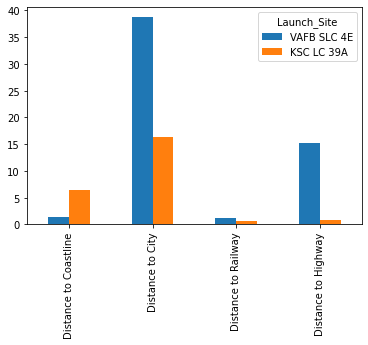

In [46]:
ax = proximities_transposed.plot.bar(rot=90)
ax

After you plot distance lines to the proximities, you can answer the following questions easily:

*   Are launch sites in close proximity to railways?
*   Are launch sites in close proximity to highways?
*   Are launch sites in close proximity to coastline?
*   Do launch sites keep certain distance away from cities?

Also please try to explain your findings.


# Next Steps:

Now you have discovered many interesting insights related to the launch sites' location using folium, in a very interactive way. Next, you will need to build a dashboard using Ploty Dash on detailed launch records.


## Authors


[Yan Luo](https://www.linkedin.com/in/yan-luo-96288783/?utm_medium=Exinfluencer&utm_source=Exinfluencer&utm_content=000026UJ&utm_term=10006555&utm_id=NA-SkillsNetwork-Channel-SkillsNetworkCoursesIBMDS0321ENSkillsNetwork26802033-2021-01-01)


### Other Contributors


Joseph Santarcangelo


## Change Log


| Date (YYYY-MM-DD) | Version | Changed By | Change Description          |
| ----------------- | ------- | ---------- | --------------------------- |
| 2021-05-26        | 1.0     | Yan        | Created the initial version |


Copyright © 2021 IBM Corporation. All rights reserved.
